## Bureau of Labor Statistics Unemployment Data to Rising Covid Outbreak in IL
### IS 455 Data Visualization
#### Jeremy Carnahan

In these initial datasets I am looking to do data discovery on BLS unemployment data in IL and compare it to the rising Covid-19 outbreak to eventually find interesting trends at a per-county level.  

In this first part, I am simply manipulating the data in Pandas and performing some cursory visualizations that will eventually become more interactive and representative down to a county level. 

In [1]:
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import ipywidgets
from IPython.display import display, clear_output


Below was my (very long) attempt to use data from the BLS RESTful API.  It was a complete failure on several fronts:
1) The .json returned must be heavily manipulated to align the data for a per county level, but achievable with some work
2) The BLS API only allows 25! data requests.  This doesn't even work if I chunk up the data and provide a series of counties in the REST payload.  In the end, this was where I had to stop and move on to a simple download of the data in a tab deliminated format.  As Dr. Naiman requested to keep all of the failed attempts, I have left my work below.

In [2]:
# def get_unemployment_data(series_id_list):
# #     url = 'https://api.bls.gov/publicAPI/v1/timeseries/data/' + 'LAUCN' + county_id + '0000000003' 
# #     data = requests.get(url).json()
# #     print('Status: ' + data['status'])

#     headers = {'Content-type': 'application/json'}
#     data = json.dumps({"seriesid": series_id_list,"startyear":"2020", "endyear":"2020"})
#     response = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
#     json_data = json.loads(response.text)
# #     county_dict = {county_id:{}}
# #     period_dict = {}
# #     for item in json_data['Results']['series'][0]['data']:
# #         period_dict[item.get('periodName')] = item.get('value')
# #     county_dict[county_id] = period_dict

#     return json_data

In [3]:
# bls_raw_areas = pd.read_csv('https://www.bls.gov/cew/classifications/areas/area-titles-csv.csv',  skiprows=range(1, 5))   

# # Here I am extracting statewide unemployment details since we want to stay at the county level. 
# bls_statewide_filter = bls_raw_areas['area_title'].str.contains('-- Statewide')
# bls_without_state = bls_raw_areas[~bls_statewide_filter]

# # Since all of the data I want has a numerical FIPS code, I will do a Pandas filter on just those rows with numeric FIPS
# # This will extract out many of the combination metropolitan areas (e.g. Champaign-Urbana) and stay with just counties.
# # Found a simple Pandas script by contributor 'Zero' on StackExchange here:  https://stackoverflow.com/questions/33961028/remove-non-numeric-rows-in-one-column-with-pandas
# bls_areas = bls_without_state[pd.to_numeric(bls_without_state['area_fips'], errors='coerce').notnull()]
# bls_areas_il = bls_areas.loc[bls_areas['area_title'].str.contains(', Illinois')]

# bls_areas_il

In [4]:
# fips_ids = bls_areas_il['area_fips'].tolist()
# fips_ids[0:10]

In [5]:
# county_unemployment = []
# for fips_chunk in more_itertools.chunked(fips_ids, 25):
#     seriesid_list = []
#     for fips in fips_chunk:    
#         seriesid = 'LAUCN' + fips + '0000000003'
#         seriesid_list.append(seriesid)
#         bls_response = get_unemployment_data(seriesid_list)
#         county_unemployment.append(bls_response)

In [6]:
# county_unemployment

In [7]:
# open output file for writing
# with open('./county_unemployment.txt', 'w') as f:
#     json.dump(county_unemployment, f)

In [8]:
# with open('C:/Users/UIUC/Desktop/UIUC/IS455_DataVis/test.json') as f:
#     d = json.load(f)
#     county_dict = {'10001':{}}
#     period_dict = {}
#     for item in d['Results']['series'][0]['data']:
#         period_dict[item.get('periodName')] = item.get('value')
#     county_dict['10001'] = period_dict
#     print(county_dict)


Our first dataset downloaded from the BLS is an unemployment dataset at a per-county level since 1994.  It is called the "LAU" dataset using BLS nomenclature.  Data can be found here:  https://download.bls.gov/pub/time.series/la/la.data.20.Illinois 

The license to the data is in the public domain as it is produced by the US government.  The data is roughly 23MB in size, so small enough to upload to most code repositories, but not as flexible as hitting a REST API unfortunately.  

In [9]:
bls_raw_il = pd.read_csv('./la.data.20.Illinois_10_20.txt', sep='\t')
bls_raw_il

,series_id,year,period,value,footnote_codes
0,LASBS170000000000003,1994,M01,5.8,NaN
1,LASBS170000000000003,1994,M02,5.8,NaN
2,LASBS170000000000003,1994,M03,5.8,NaN
3,LASBS170000000000003,1994,M04,5.7,NaN
4,LASBS170000000000003,1994,M05,5.5,NaN
...,...,...,...,...,...
437089,LAUST170000000000009,2020,M06,9981183.0,NaN
437090,LAUST170000000000009,2020,M07,9980184.0,NaN
437091,LAUST170000000000009,2020,M08,9979489.0,NaN
437092,LAUST170000000000009,2020,M09,9978718.0,NaN


In [10]:
#bls_clean_il = bls_raw_il[bls_raw_il['series_id'].str.endswith('003')]
bls_rate_il = bls_raw_il[bls_raw_il['series_id'].str.contains('0000000003')]
bls_rate_year = pd.to_datetime(bls_rate_il.year, format='%Y')


In [11]:
bls_rate_2020_il = bls_rate_il[bls_rate_il['year'] == 2020] #subset to only the current 2020 year
bls_rate_2020_il_cn = bls_rate_2020_il[bls_rate_2020_il['series_id'].str.contains('LAUCN')] #subet to only IL county data

In [12]:
bls_rate_2020_il_cn

,series_id,year,period,value,footnote_codes
18786,LAUCN170010000000003,2020,M01,3.3,NaN
18787,LAUCN170010000000003,2020,M02,2.8,NaN
18788,LAUCN170010000000003,2020,M03,2.5,NaN
18789,LAUCN170010000000003,2020,M04,12.0,NaN
18790,LAUCN170010000000003,2020,M05,10.5,NaN
...,...,...,...,...,...
180391,LAUCN172030000000003,2020,M06,9.3,NaN
180392,LAUCN172030000000003,2020,M07,7.3,NaN
180393,LAUCN172030000000003,2020,M08,6.5,NaN
180394,LAUCN172030000000003,2020,M09,5.6,NaN


Next we need to convert the period data from a "Mxx" to an actual month that we'll use in our later time series analysis.  We'll do this by setting conditions with pandas .select() method.  I found guidance on this approach by Charlie Custer on dataquest.io here: https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

In [13]:
conditions = [
    (bls_rate_2020_il_cn['period'] == 'M01'),
    (bls_rate_2020_il_cn['period'] == 'M02'),
    (bls_rate_2020_il_cn['period'] == 'M03'),
    (bls_rate_2020_il_cn['period'] == 'M04'),
    (bls_rate_2020_il_cn['period'] == 'M05'),
    (bls_rate_2020_il_cn['period'] == 'M06'),
    (bls_rate_2020_il_cn['period'] == 'M07'),
    (bls_rate_2020_il_cn['period'] == 'M08'),
    (bls_rate_2020_il_cn['period'] == 'M09'),
    (bls_rate_2020_il_cn['period'] == 'M010'),
    (bls_rate_2020_il_cn['period'] == 'M011'),
    (bls_rate_2020_il_cn['period'] == 'M012')
]

mo_values = ['01-2020', '02-2020', '03-2020', '04-2020', '05-2020', '06-2020', '07-2020', '08-2020', '09-2020',
            '10-2020', '11-2020', '12-2020']

In [14]:
bls_rate_2020_il_cn['dateString'] = np.select(conditions, mo_values)
bls_rate_2020_il_cn = bls_rate_2020_il_cn.reset_index(drop=True) #Found way to reindex from StackOverflow by Shubham Sharma
# here: https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe 

C:\Users\UIUC\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


I need to also extract the Illinois county's federal ID code (FIPS) in order to later join with geographical boarder data.  We'll do that in Pandas by applying a slicing method and adding a new column called "fips". 

In [15]:
bls_rate_2020_il_cn['fips'] = bls_rate_2020_il_cn.series_id.str[7:10]  

In [16]:
bls_rate_2020_il_cn

,series_id,year,period,value,footnote_codes,dateString,fips
0,LAUCN170010000000003,2020,M01,3.3,NaN,01-2020,001
1,LAUCN170010000000003,2020,M02,2.8,NaN,02-2020,001
2,LAUCN170010000000003,2020,M03,2.5,NaN,03-2020,001
3,LAUCN170010000000003,2020,M04,12.0,NaN,04-2020,001
4,LAUCN170010000000003,2020,M05,10.5,NaN,05-2020,001
...,...,...,...,...,...,...,...
1015,LAUCN172030000000003,2020,M06,9.3,NaN,06-2020,203
1016,LAUCN172030000000003,2020,M07,7.3,NaN,07-2020,203
1017,LAUCN172030000000003,2020,M08,6.5,NaN,08-2020,203
1018,LAUCN172030000000003,2020,M09,5.6,NaN,09-2020,203


In [17]:
bls_rate_2020_il_cn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   series_id       1020 non-null   object 
 1   year            1020 non-null   int64  
 2   period          1020 non-null   object 
 3   value           1020 non-null   float64
 4   footnote_codes  102 non-null    object 
 5   dateString      1020 non-null   object 
 6   fips            1020 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 55.9+ KB


In [18]:
# pd.set_option('display.max_rows', None)

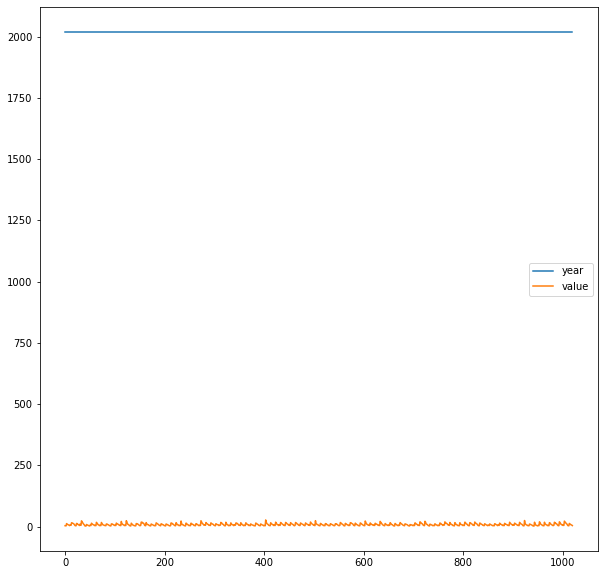

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
bls_rate_2020_il_cn.plot(ax=ax)
plt.show()

In [20]:
bls_rate_2020_il_cn

,series_id,year,period,value,footnote_codes,dateString,fips
0,LAUCN170010000000003,2020,M01,3.3,NaN,01-2020,001
1,LAUCN170010000000003,2020,M02,2.8,NaN,02-2020,001
2,LAUCN170010000000003,2020,M03,2.5,NaN,03-2020,001
3,LAUCN170010000000003,2020,M04,12.0,NaN,04-2020,001
4,LAUCN170010000000003,2020,M05,10.5,NaN,05-2020,001
...,...,...,...,...,...,...,...
1015,LAUCN172030000000003,2020,M06,9.3,NaN,06-2020,203
1016,LAUCN172030000000003,2020,M07,7.3,NaN,07-2020,203
1017,LAUCN172030000000003,2020,M08,6.5,NaN,08-2020,203
1018,LAUCN172030000000003,2020,M09,5.6,NaN,09-2020,203


This dataset was retrieved from Chicago Reporter on "Observablehq.com" which is an organization that uses data to look at social inequalities.  They have an aggregation service that uses the IL Dept. of Health API to pull the most recent data.  Here the data are made public with an MIT license for use.  The data can be found here:  https://observablehq.com/@chicagoreporter/coronavirus-illinois-historical-counts  and is only 23K in size.

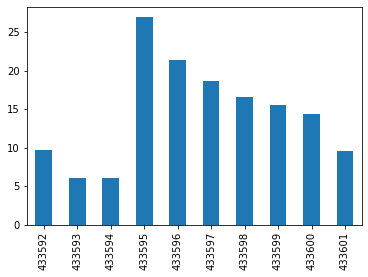

In [21]:
a = bls_rate_2020_il.groupby('series_id', as_index=False)['value'].plot.bar('value')
plt.show()

In [22]:
covid_raw_il = pd.read_csv('./il-statewide-covid-counts-through-2020-12-03.csv', sep=',', parse_dates=['dateString'],
                          index_col=['dateString'])

# To datetime found on Pandas Docs:  https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-csv-mixed-timezones
covid_raw_il

,confirmed_cases,confirmed_cases_change,confirmed_cases_change_pct,confirmed_cases_minus_deaths,deaths,deaths_change,deaths_change_pct,total_tested,total_tested_change,total_tested_change_pct,date
dateString,,,,,,,,,,,
2020-01-24,1,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,2020-01-24T00:00:00.000Z
2020-01-30,2,1.0,100.00,2,0,0.0,0.00,NaN,NaN,0.00,2020-01-30T00:00:00.000Z
2020-02-29,3,1.0,50.00,3,0,0.0,0.00,NaN,NaN,0.00,2020-02-29T00:00:00.000Z
2020-03-02,4,1.0,33.33,4,0,0.0,0.00,NaN,NaN,0.00,2020-03-02T00:00:00.000Z
2020-03-05,5,1.0,25.00,5,0,0.0,0.00,NaN,NaN,0.00,2020-03-05T00:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-29,720114,7178.0,1.01,707921,12193,56.0,0.46,10431018.0,62740.0,0.61,2020-11-29T00:00:00.000Z
2020-11-30,726304,6190.0,0.86,714026,12278,85.0,0.70,10497998.0,66980.0,0.64,2020-11-30T00:00:00.000Z
2020-12-01,738846,12542.0,1.73,726443,12403,125.0,1.02,10614079.0,116081.0,1.11,2020-12-01T00:00:00.000Z


In [23]:
# Take a look at the data types to determine if date values are in dateTime type.
covid_raw_il.dtypes

confirmed_cases                   int64
confirmed_cases_change          float64
confirmed_cases_change_pct      float64
confirmed_cases_minus_deaths      int64
deaths                            int64
deaths_change                   float64
deaths_change_pct               float64
total_tested                    float64
total_tested_change             float64
total_tested_change_pct         float64
date                             object
dtype: object

In [24]:
# covid_raw_il['pd_date'] = pd.to_datetime(covid_raw_il['date'],format='%Y-%m-%d') #Not needed because I assigned dateTime to
# dateString at .csv import

In [25]:
covid_raw_il.index

DatetimeIndex(['2020-01-24', '2020-01-30', '2020-02-29', '2020-03-02',
               '2020-03-05', '2020-03-06', '2020-03-09', '2020-03-10',
               '2020-03-11', '2020-03-12',
               ...
               '2020-11-24', '2020-11-25', '2020-11-26', '2020-11-27',
               '2020-11-28', '2020-11-29', '2020-11-30', '2020-12-01',
               '2020-12-02', '2020-12-03'],
              dtype='datetime64[ns]', name='dateString', length=276, freq=None)

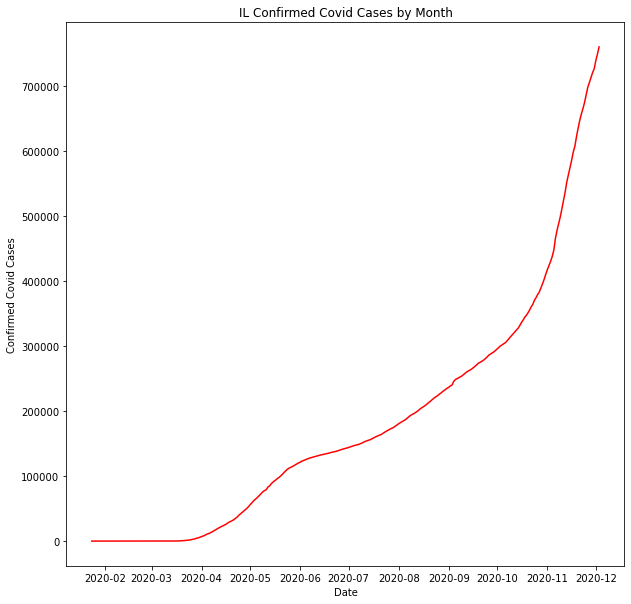

In [26]:
# Wanted to just create a simple Matplotlib line chart, but the module is not automatically recognizing my dateTime .dType of 
# dateString.  Have to be explicit in the plt parameters.
# covid_raw_il.plot.line()  # does not work!

# Found an excellent tutorial on using datetime from normal Pandas object here:
# https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/

fig, ax = plt.subplots(figsize=(10,10))

plt.plot(covid_raw_il.index.values, covid_raw_il['confirmed_cases'], color='red')
ax.set(xlabel= "Date",
      ylabel="Confirmed Covid Cases",
      title="IL Confirmed Covid Cases by Month")
plt.show()

In [27]:
# We need to reindex back to a range index in order to use pandas .grouper() method later to groupby and aggregate by mean.
covid_raw_il.reset_index(inplace=True)

# # Let's drop the month's day since we'll be joining with unemployment data above without day.
# covid_raw_il['dateString'] = covid_raw_il['dateString'].dt.strftime('%m-%Y') #this didn't work!  I found I need to use .dt
# on my last step, otherwise I will always lose dateTime .dtype.
# https://stackoverflow.com/questions/52869614/pandas-convert-datetime-format-mm-dd-yyyy-to-dd-mm-yyyy

In [28]:
covid_raw_il.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   dateString                    276 non-null    datetime64[ns]
 1   confirmed_cases               276 non-null    int64         
 2   confirmed_cases_change        275 non-null    float64       
 3   confirmed_cases_change_pct    275 non-null    float64       
 4   confirmed_cases_minus_deaths  276 non-null    int64         
 5   deaths                        276 non-null    int64         
 6   deaths_change                 275 non-null    float64       
 7   deaths_change_pct             275 non-null    float64       
 8   total_tested                  269 non-null    float64       
 9   total_tested_change           269 non-null    float64       
 10  total_tested_change_pct       275 non-null    float64       
 11  date                          27

In [29]:
# Used Grouper() method from Pandas to group by month and average values using Pandas docs for guidance here:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
covid_il_grouped = covid_raw_il.groupby(pd.Grouper(key='dateString', freq='M')).max()

In [30]:
covid_il_grouped.reset_index(inplace=True)

In [31]:
covid_il_grouped['dateString'] = covid_il_grouped['dateString'].dt.strftime('%m-%Y')

In [32]:
covid_il_grouped

,dateString,confirmed_cases,confirmed_cases_change,confirmed_cases_change_pct,confirmed_cases_minus_deaths,deaths,deaths_change,deaths_change_pct,total_tested,total_tested_change,total_tested_change_pct,date
0,01-2020,2,1.0,100.00,2,0,0.0,0.00,NaN,NaN,0.00,2020-01-30T00:00:00.000Z
1,02-2020,3,1.0,50.00,3,0,0.0,0.00,NaN,NaN,0.00,2020-02-29T00:00:00.000Z
2,03-2020,5994,1105.0,100.00,5895,99,27.0,200.00,35225.0,4911.0,59.46,2020-03-31T00:00:00.000Z
3,04-2020,52918,2724.0,16.45,50563,2355,142.0,42.42,269867.0,16124.0,14.65,2020-04-30T00:00:00.000Z
4,05-2020,120260,4014.0,5.93,114871,5389,191.0,6.61,898259.0,29307.0,6.61,2020-05-31T00:00:00.000Z
5,06-2020,143185,1614.0,1.33,136264,6921,116.0,2.07,1602965.0,31686.0,2.62,2020-06-30T00:00:00.000Z
6,07-2020,178837,1941.0,1.10,171342,7495,37.0,0.53,2699568.0,49782.0,2.13,2020-07-31T00:00:00.000Z
7,08-2020,235023,2356.0,1.15,226998,8025,36.0,0.45,4064161.0,56766.0,1.64,2020-08-31T00:00:00.000Z
8,09-2020,293274,5368.0,2.24,284603,8671,39.0,0.49,5624822.0,149273.0,3.59,2020-09-30T00:00:00.000Z
9,10-2020,410300,7899.0,1.96,400543,9757,67.0,0.72,7729845.0,95111.0,1.34,2020-10-31T00:00:00.000Z


In [33]:
covid_il_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dateString                    12 non-null     object 
 1   confirmed_cases               12 non-null     int64  
 2   confirmed_cases_change        12 non-null     float64
 3   confirmed_cases_change_pct    12 non-null     float64
 4   confirmed_cases_minus_deaths  12 non-null     int64  
 5   deaths                        12 non-null     int64  
 6   deaths_change                 12 non-null     float64
 7   deaths_change_pct             12 non-null     float64
 8   total_tested                  10 non-null     float64
 9   total_tested_change           10 non-null     float64
 10  total_tested_change_pct       12 non-null     float64
 11  date                          12 non-null     object 
dtypes: float64(7), int64(3), object(2)
memory usage: 1.2+ KB


In [34]:
bls_rate_2020_il_cn

,series_id,year,period,value,footnote_codes,dateString,fips
0,LAUCN170010000000003,2020,M01,3.3,NaN,01-2020,001
1,LAUCN170010000000003,2020,M02,2.8,NaN,02-2020,001
2,LAUCN170010000000003,2020,M03,2.5,NaN,03-2020,001
3,LAUCN170010000000003,2020,M04,12.0,NaN,04-2020,001
4,LAUCN170010000000003,2020,M05,10.5,NaN,05-2020,001
...,...,...,...,...,...,...,...
1015,LAUCN172030000000003,2020,M06,9.3,NaN,06-2020,203
1016,LAUCN172030000000003,2020,M07,7.3,NaN,07-2020,203
1017,LAUCN172030000000003,2020,M08,6.5,NaN,08-2020,203
1018,LAUCN172030000000003,2020,M09,5.6,NaN,09-2020,203


In [35]:
lau_covid_il = pd.merge(bls_rate_2020_il_cn, covid_il_grouped, how='left', on=['dateString', 'dateString'])

In [36]:
lau_covid_il

,series_id,year,period,value,footnote_codes,dateString,fips,confirmed_cases,confirmed_cases_change,confirmed_cases_change_pct,confirmed_cases_minus_deaths,deaths,deaths_change,deaths_change_pct,total_tested,total_tested_change,total_tested_change_pct,date
0,LAUCN170010000000003,2020,M01,3.3,NaN,01-2020,001,2.0,1.0,100.00,2.0,0.0,0.0,0.00,NaN,NaN,0.00,2020-01-30T00:00:00.000Z
1,LAUCN170010000000003,2020,M02,2.8,NaN,02-2020,001,3.0,1.0,50.00,3.0,0.0,0.0,0.00,NaN,NaN,0.00,2020-02-29T00:00:00.000Z
2,LAUCN170010000000003,2020,M03,2.5,NaN,03-2020,001,5994.0,1105.0,100.00,5895.0,99.0,27.0,200.00,35225.0,4911.0,59.46,2020-03-31T00:00:00.000Z
3,LAUCN170010000000003,2020,M04,12.0,NaN,04-2020,001,52918.0,2724.0,16.45,50563.0,2355.0,142.0,42.42,269867.0,16124.0,14.65,2020-04-30T00:00:00.000Z
4,LAUCN170010000000003,2020,M05,10.5,NaN,05-2020,001,120260.0,4014.0,5.93,114871.0,5389.0,191.0,6.61,898259.0,29307.0,6.61,2020-05-31T00:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,LAUCN172030000000003,2020,M06,9.3,NaN,06-2020,203,143185.0,1614.0,1.33,136264.0,6921.0,116.0,2.07,1602965.0,31686.0,2.62,2020-06-30T00:00:00.000Z
1016,LAUCN172030000000003,2020,M07,7.3,NaN,07-2020,203,178837.0,1941.0,1.10,171342.0,7495.0,37.0,0.53,2699568.0,49782.0,2.13,2020-07-31T00:00:00.000Z
1017,LAUCN172030000000003,2020,M08,6.5,NaN,08-2020,203,235023.0,2356.0,1.15,226998.0,8025.0,36.0,0.45,4064161.0,56766.0,1.64,2020-08-31T00:00:00.000Z
1018,LAUCN172030000000003,2020,M09,5.6,NaN,09-2020,203,293274.0,5368.0,2.24,284603.0,8671.0,39.0,0.49,5624822.0,149273.0,3.59,2020-09-30T00:00:00.000Z


In [37]:
# Here we need to convert the fips column to an int so we can merge with the IL county geopandas boundaries below.
lau_covid_il['fips'] = pd.to_numeric(lau_covid_il['fips'])

In [38]:
lau_covid_il.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1019
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   series_id                     1020 non-null   object 
 1   year                          1020 non-null   int64  
 2   period                        1020 non-null   object 
 3   value                         1020 non-null   float64
 4   footnote_codes                102 non-null    object 
 5   dateString                    1020 non-null   object 
 6   fips                          1020 non-null   int64  
 7   confirmed_cases               918 non-null    float64
 8   confirmed_cases_change        918 non-null    float64
 9   confirmed_cases_change_pct    918 non-null    float64
 10  confirmed_cases_minus_deaths  918 non-null    float64
 11  deaths                        918 non-null    float64
 12  deaths_change                 918 non-null    float64
 13  dea

In [39]:
# ESRI Open data with Creative Commons license found here: 
# https://www.arcgis.com/home/item.html?id=72da6887c3fc4070b62f534eac5ea079
il_bound = gpd.read_file("https://opendata.arcgis.com/datasets/72da6887c3fc4070b62f534eac5ea079_0.geojson")

In [40]:
il_bound

,FID,AREA_,PERIMETER,NC4_,NC4_ID,FIPS_CO,STATE_CODE,TOTALPOP,NAME_LC,DISTRICT,COUNTY_NAM,STR_STATEC,SHAPE_area,SHAPE_len,GlobalID,geometry
0,1,1.314209e+10,504248.19090,2,3,97,49,519515,lake,1,LAKE,049,1.314209e+10,504248.166488,55f98094-bcc0-4607-a199-467bc5df2139,"POLYGON ((-87.80265 42.49259, -87.80256 42.491..."
1,2,1.704184e+10,522912.63363,3,5,111,56,183241,mchenry,1,MCHENRY,056,1.704263e+10,522779.162317,0ef63edc-8fe9-4d46-a5f3-e1b75495f9d1,"POLYGON ((-88.19946 42.49407, -88.19944 42.492..."
2,3,1.724584e+10,579951.49059,4,1,85,43,21821,jodaviess,2,JO DAVIESS,043,1.724584e+10,579951.512994,d568bb64-2c05-466a-817a-8504e63d6540,"POLYGON ((-90.63082 42.50789, -90.61836 42.507..."
3,4,1.574499e+10,506026.51459,5,2,177,89,48052,stephenson,2,STEPHENSON,089,1.574499e+10,506026.547630,2b46c7bf-691b-4e3f-9395-6a27984f5885,"POLYGON ((-89.74155 42.50539, -89.74155 42.505..."
4,5,1.447768e+10,501614.78373,6,4,201,101,252913,winnebago,2,WINNEBAGO,101,1.447768e+10,501614.722490,74d3257f-8e23-4bbf-91b1-b5cf2b4650c4,"POLYGON ((-89.38438 42.50033, -89.38293 42.500..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,9.723745e+09,422725.03361,99,98,87,44,11347,johnson,9,JOHNSON,044,9.723745e+09,422725.029759,05214a4a-18af-4938-9418-c4e1f8f6c5e0,"POLYGON ((-88.76045 37.60023, -88.75383 37.600..."
98,99,1.176391e+10,489546.21914,100,99,181,91,17619,union,9,UNION,091,1.176391e+10,489546.255506,a0451377-b2a4-43a1-a85e-92dae9179937,"POLYGON ((-89.09913 37.59795, -89.09870 37.597..."
99,100,6.758354e+09,379787.08595,101,100,127,64,14752,massac,9,MASSAC,064,6.758354e+09,379787.129540,06b40696-a54e-465c-9896-131d0c6b9ab1,"POLYGON ((-88.71063 37.33699, -88.70445 37.332..."
100,101,5.670785e+09,459129.16659,102,102,153,77,7523,pulaski,9,PULASKI,077,5.670784e+09,459129.227046,0be0e256-307f-4057-922a-ece257de8a7d,"POLYGON ((-89.21666 37.33514, -89.20959 37.334..."


In [41]:
il_bound.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         102 non-null    int64   
 1   AREA_       102 non-null    float64 
 2   PERIMETER   102 non-null    float64 
 3   NC4_        102 non-null    int64   
 4   NC4_ID      102 non-null    int64   
 5   FIPS_CO     102 non-null    int64   
 6   STATE_CODE  102 non-null    int64   
 7   TOTALPOP    102 non-null    int64   
 8   NAME_LC     102 non-null    object  
 9   DISTRICT    102 non-null    int64   
 10  COUNTY_NAM  102 non-null    object  
 11  STR_STATEC  102 non-null    object  
 12  SHAPE_area  102 non-null    float64 
 13  SHAPE_len   102 non-null    float64 
 14  GlobalID    102 non-null    object  
 15  geometry    102 non-null    geometry
dtypes: float64(4), geometry(1), int64(7), object(4)
memory usage: 12.9+ KB


In [42]:
# I made the mistake of thinking FIPS_CO and STR_STATEC were the same, and later learned that FIPS will always be odd numbers.
# This matches up with the BLS area code prefix that also uses part of the county's FIPS code.
# il_bound = il_bound.sort_values('STATE_CODE')
# il_bound['bls_code'] = il_bound['FIPS_CO'] + range(len(il_bound))

In [43]:
il_bound

,FID,AREA_,PERIMETER,NC4_,NC4_ID,FIPS_CO,STATE_CODE,TOTALPOP,NAME_LC,DISTRICT,COUNTY_NAM,STR_STATEC,SHAPE_area,SHAPE_len,GlobalID,geometry
0,1,1.314209e+10,504248.19090,2,3,97,49,519515,lake,1,LAKE,049,1.314209e+10,504248.166488,55f98094-bcc0-4607-a199-467bc5df2139,"POLYGON ((-87.80265 42.49259, -87.80256 42.491..."
1,2,1.704184e+10,522912.63363,3,5,111,56,183241,mchenry,1,MCHENRY,056,1.704263e+10,522779.162317,0ef63edc-8fe9-4d46-a5f3-e1b75495f9d1,"POLYGON ((-88.19946 42.49407, -88.19944 42.492..."
2,3,1.724584e+10,579951.49059,4,1,85,43,21821,jodaviess,2,JO DAVIESS,043,1.724584e+10,579951.512994,d568bb64-2c05-466a-817a-8504e63d6540,"POLYGON ((-90.63082 42.50789, -90.61836 42.507..."
3,4,1.574499e+10,506026.51459,5,2,177,89,48052,stephenson,2,STEPHENSON,089,1.574499e+10,506026.547630,2b46c7bf-691b-4e3f-9395-6a27984f5885,"POLYGON ((-89.74155 42.50539, -89.74155 42.505..."
4,5,1.447768e+10,501614.78373,6,4,201,101,252913,winnebago,2,WINNEBAGO,101,1.447768e+10,501614.722490,74d3257f-8e23-4bbf-91b1-b5cf2b4650c4,"POLYGON ((-89.38438 42.50033, -89.38293 42.500..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,9.723745e+09,422725.03361,99,98,87,44,11347,johnson,9,JOHNSON,044,9.723745e+09,422725.029759,05214a4a-18af-4938-9418-c4e1f8f6c5e0,"POLYGON ((-88.76045 37.60023, -88.75383 37.600..."
98,99,1.176391e+10,489546.21914,100,99,181,91,17619,union,9,UNION,091,1.176391e+10,489546.255506,a0451377-b2a4-43a1-a85e-92dae9179937,"POLYGON ((-89.09913 37.59795, -89.09870 37.597..."
99,100,6.758354e+09,379787.08595,101,100,127,64,14752,massac,9,MASSAC,064,6.758354e+09,379787.129540,06b40696-a54e-465c-9896-131d0c6b9ab1,"POLYGON ((-88.71063 37.33699, -88.70445 37.332..."
100,101,5.670785e+09,459129.16659,102,102,153,77,7523,pulaski,9,PULASKI,077,5.670784e+09,459129.227046,0be0e256-307f-4057-922a-ece257de8a7d,"POLYGON ((-89.21666 37.33514, -89.20959 37.334..."


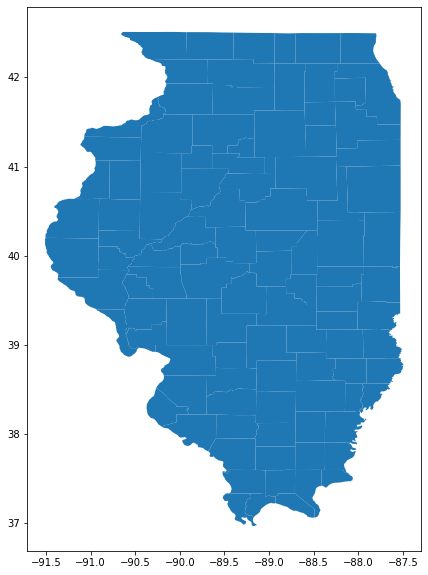

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
il_bound.plot(ax=ax)
plt.show()

In [45]:
il_covid_map = pd.merge(lau_covid_il, il_bound, how='left', left_on='fips', right_on='FIPS_CO')

In [46]:
il_covid_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1019
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   series_id                     1020 non-null   object  
 1   year                          1020 non-null   int64   
 2   period                        1020 non-null   object  
 3   value                         1020 non-null   float64 
 4   footnote_codes                102 non-null    object  
 5   dateString                    1020 non-null   object  
 6   fips                          1020 non-null   int64   
 7   confirmed_cases               918 non-null    float64 
 8   confirmed_cases_change        918 non-null    float64 
 9   confirmed_cases_change_pct    918 non-null    float64 
 10  confirmed_cases_minus_deaths  918 non-null    float64 
 11  deaths                        918 non-null    float64 
 12  deaths_change                 918 non-null    fl

In [47]:
il_covid_map

,series_id,year,period,value,footnote_codes,dateString,fips,confirmed_cases,confirmed_cases_change,confirmed_cases_change_pct,...,STATE_CODE,TOTALPOP,NAME_LC,DISTRICT,COUNTY_NAM,STR_STATEC,SHAPE_area,SHAPE_len,GlobalID,geometry
0,LAUCN170010000000003,2020,M01,3.3,NaN,01-2020,1,2.0,1.0,100.00,...,1,66090,adams,6,ADAMS,001,2.429405e+10,632871.258309,11f4cc80-d397-44fa-a5e1-e39af4c01b7b,"POLYGON ((-91.44645 40.19953, -91.44645 40.199..."
1,LAUCN170010000000003,2020,M02,2.8,NaN,02-2020,1,3.0,1.0,50.00,...,1,66090,adams,6,ADAMS,001,2.429405e+10,632871.258309,11f4cc80-d397-44fa-a5e1-e39af4c01b7b,"POLYGON ((-91.44645 40.19953, -91.44645 40.199..."
2,LAUCN170010000000003,2020,M03,2.5,NaN,03-2020,1,5994.0,1105.0,100.00,...,1,66090,adams,6,ADAMS,001,2.429405e+10,632871.258309,11f4cc80-d397-44fa-a5e1-e39af4c01b7b,"POLYGON ((-91.44645 40.19953, -91.44645 40.199..."
3,LAUCN170010000000003,2020,M04,12.0,NaN,04-2020,1,52918.0,2724.0,16.45,...,1,66090,adams,6,ADAMS,001,2.429405e+10,632871.258309,11f4cc80-d397-44fa-a5e1-e39af4c01b7b,"POLYGON ((-91.44645 40.19953, -91.44645 40.199..."
4,LAUCN170010000000003,2020,M05,10.5,NaN,05-2020,1,120260.0,4014.0,5.93,...,1,66090,adams,6,ADAMS,001,2.429405e+10,632871.258309,11f4cc80-d397-44fa-a5e1-e39af4c01b7b,"POLYGON ((-91.44645 40.19953, -91.44645 40.199..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,LAUCN172030000000003,2020,M06,9.3,NaN,06-2020,203,143185.0,1614.0,1.33,...,102,32653,woodford,4,WOODFORD,102,1.513613e+10,570047.672789,3a2aa4be-ace4-4289-8062-93ea11563737,"POLYGON ((-88.93142 40.92773, -88.93147 40.916..."
1016,LAUCN172030000000003,2020,M07,7.3,NaN,07-2020,203,178837.0,1941.0,1.10,...,102,32653,woodford,4,WOODFORD,102,1.513613e+10,570047.672789,3a2aa4be-ace4-4289-8062-93ea11563737,"POLYGON ((-88.93142 40.92773, -88.93147 40.916..."
1017,LAUCN172030000000003,2020,M08,6.5,NaN,08-2020,203,235023.0,2356.0,1.15,...,102,32653,woodford,4,WOODFORD,102,1.513613e+10,570047.672789,3a2aa4be-ace4-4289-8062-93ea11563737,"POLYGON ((-88.93142 40.92773, -88.93147 40.916..."
1018,LAUCN172030000000003,2020,M09,5.6,NaN,09-2020,203,293274.0,5368.0,2.24,...,102,32653,woodford,4,WOODFORD,102,1.513613e+10,570047.672789,3a2aa4be-ace4-4289-8062-93ea11563737,"POLYGON ((-88.93142 40.92773, -88.93147 40.916..."


In [48]:
# I was having issues with plotting my new merged dataframe, and found on this StackOverflow that when I performed the merge
# above between a pandas dataframe and a geopandas dataframe, it takes the type of a regular Pandas dataframe.  
# Solution provided by Dharman here: https://stackoverflow.com/questions/63974040/line2d-object-has-no-property-column
il_covid_map = GeoDataFrame(il_covid_map)

In [49]:
type(il_covid_map)

geopandas.geodataframe.GeoDataFrame

In [50]:
sept = il_covid_map[il_covid_map['dateString']=='09-2020']

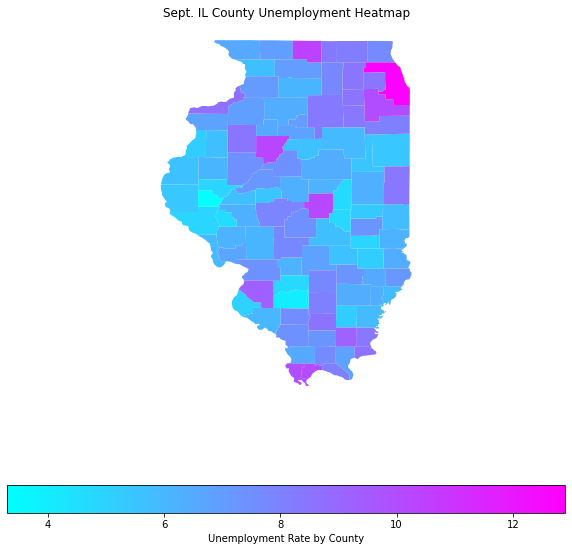

In [51]:
# Generate the choropleth map using gdf plot function on the Confirmed 
# I liked the styling that Kishan Nagaraj used for his Covid-19 world map, but his code did not seem well formed when compared
# to what we learned in this class.  I instead reused his color choices, but used Dr. Naiman's code approach below.
columnfig = sept.plot(column='value',cmap='cool',figsize=(10,10),
                              legend = True, legend_kwds={'label': "Unemployment Rate by County",'orientation': "horizontal"})
# remove axis ticks
plt.axis('off')
plt.title("Sept. IL County Unemployment Heatmap")
plt.show()

In [52]:
# ToggleButtons ipywidget code sample from ipywidget docs here:  
# https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#ToggleButtons
month_toggle = ipywidgets.ToggleButtons(
    options=['01-2020', '02-2020', '03-2020', '04-2020','05-2020','06-2020','07-2020','08-2020','09-2020','10-2020','11-2020',],
    description='Period:',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    # tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
    # icons=['check'] * 3
)

covid_raw_il['dateString'] = pd.to_datetime(covid_raw_il['dateString'], format='%m-%Y')
covid_raw_il.set_index('dateString', inplace=True)

def county_plot(date):
    clear_output()
    # Setup plt subplot criteria
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize = (20,10))
    # Title formating from matplotlib docs here:  https://matplotlib.org/tutorials/text/text_intro.html 
    fig.suptitle('IL Unemployment by Confirmed COVID-19 Cases', fontsize=14, fontweight='bold')
    
    # plotting the line plot of confirmed Covid-19 cases at time period selected
    covid_raw_il.index.values, covid_raw_il['confirmed_cases'].plot(ax=ax1, color='blue')
    ax1.set(xlabel= "Date",
          ylabel="Confirmed Covid Cases",
          title="IL Confirmed Covid Cases by Month")
    
    # plotting the IL county heatmap
    il_covid_map[il_covid_map.dateString == date['new']].plot(ax=ax2, column='value',
                                                              cmap='cool',
                                                              legend=True,
                                                              legend_kwds={'label': "Unemployment Rate (%)"}).axis('off')
    ax2.set(xlabel= "Date",
          title="IL County Unemployment Rates")
    
    plt.show()
    display(month_toggle)


# Below is a ipywidget that creates a month slider that I got from ipywidgets docs, but unfortunately it requires the user to
# use an upper and lower bound month, and I just simply wanted one month to select, not a range.  Unfortunately it requires a
# 2 value tuple input or the widget will not run.  On to the next option which is ToggleButtons widget.
# county_plot('11-2020')
    
# def slider_output(change):
#     print(change)

# import datetime
# dates = [datetime.date(2020,i,1) for i in range(1,13)]
# options = [(i.strftime('%b'), i) for i in dates]
# month_slider = ipywidgets.SelectionRangeSlider(
#     options=options,
#     index=(0,0),
#     description='Months 2020',
#     disabled=False
# )

# month_slider.observe(slider_output, 'value')
# month_slider


# Test function to read ToggleButtons() ipywidgets output.  Not used in production plots.
def toggle_output(change):
    print(change)

month_toggle.observe(county_plot, 'value')


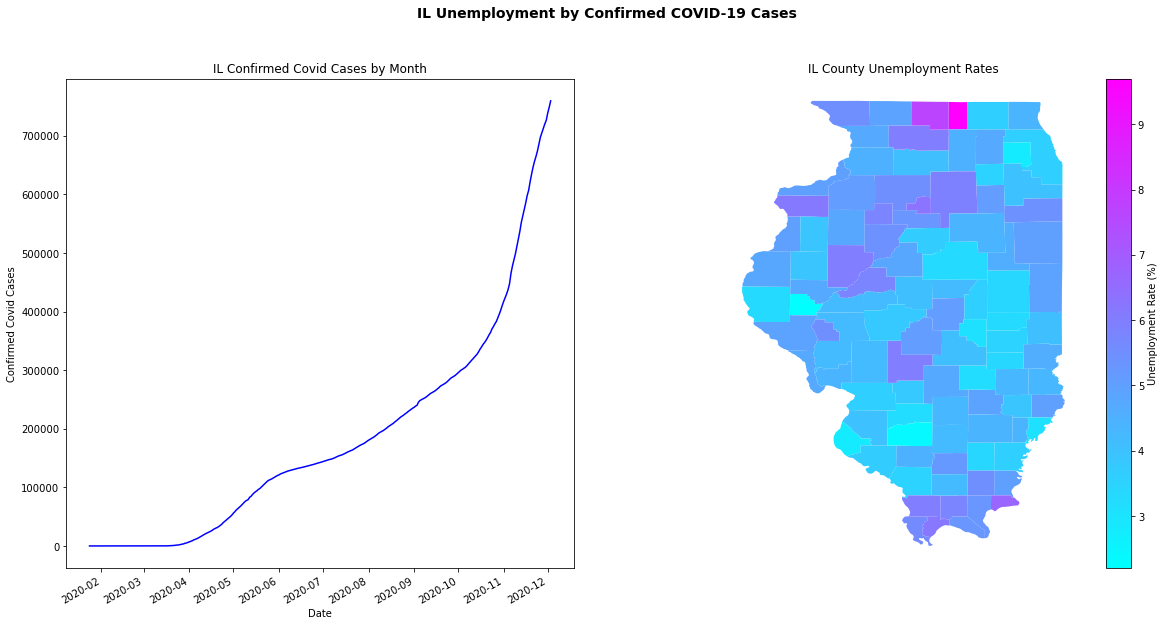

ToggleButtons(button_style='info', description='Period:', options=('01-2020', '02-2020', '03-2020', '04-2020',…

In [53]:
county_plot({'new':'01-2020'})

#### Conclusion

This dashboard can be used by a layman to quickly see the rise in covid cases and make visually tie into the unemployment rate across the state of IL.  The power of visually consuming this information is more useful than simple tables or even statistical analysis when presenting to the general public. Further analysis can be added to allow more technical analysis based on the needs of the consumer; however, we start with simple interactions and iterate into more complex.